In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

import keras
from keras.models import Sequential
from keras.layers.core import Activation, Flatten, Dense, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras import regularizers
#from keras.layers.convolutional import Convolution2D, MaxPooling2D
from sklearn.model_selection import train_test_split

% matplotlib inline

In [9]:
X = np.load("npy_dataset/X.npy")
Y = np.load("npy_dataset/Y.npy")

In [10]:
print("shape of X:",X.shape)
print("shape of Y:",Y.shape)


('shape of X:', (5373, 100, 100, 3))
('shape of Y:', (5373, 11))


In [11]:
#Train_Test_Split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.10, random_state=1)

In [12]:
x_train = x_train.reshape(-1,100,100,3)
x_test = x_test.reshape(-1,100,100,3)

In [6]:
print("shape of x_train:",x_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of y_train:",y_train.shape)
print("shape of y_test:",y_test.shape)

('shape of x_train:', (4599, 100, 100, 3))
('shape of x_test:', (512, 100, 100, 3))
('shape of y_train:', (4599, 11))
('shape of y_test:', (512, 11))


In [13]:
#Our Model
def LeNet(width, height, channels, output):
    model = Sequential()
    
    #Convulation 1
    model.add(Conv2D(filters=32, kernel_size=(3,3)
                ,strides=(2,2)
                ,input_shape=(width, height, channels)))
    
    #ReLU Activation
    model.add(Activation('relu'))
    
    #Pooling
    model.add(MaxPool2D(pool_size=(2,2)))
    
    #Convolution 2
    model.add(Conv2D(filters=64, kernel_size=(3,3)
                    ,strides=(1,1)
                    ,kernel_regularizer=regularizers.l2(0.01)))
    
    #ReLU Activation
    model.add(Activation('relu'))
    
    
    #Pooling
    model.add(MaxPool2D(pool_size=(2,2)))
    
    #Convulation 3
    model.add(Conv2D(filters=100, kernel_size=(2,2)
                ,strides=(1,1)))
    
    #ReLU Activation
    model.add(Activation('relu'))
    
    #Pooling
    model.add(MaxPool2D(pool_size=(2,2)))
    
    model.add(Flatten())
    
    #Hidden Layer
    model.add(Dense(100))
    
    model.add(Dropout(0.2))
    
    model.add(Activation('relu'))
    
    #Hidden Layer
    model.add(Dense(50))
    
    model.add(Dropout(0.2))
    
    model.add(Activation('relu'))
    
    model.add(Dense(output))
    
    model.add(Activation('softmax'))
    
    return model
    
#     We can also add dropout
# Total params: 300,803
# Trainable params: 300,803
# Non-trainable params: 0

#loss: 0.0366 - acc: 0.9940 - val_loss: 0.2803 - val_acc: 0.9545

In [8]:
# model2 = LeNet2(x_train.shape[1],x_train.shape[2],3,y_train.shape[1])

# model2.summary()

In [9]:
#Our Model
# def LeNet(width, height, channels, output):
#     model = Sequential()
    
#     #Convulation
#     model.add(Conv2D(filters=32, kernel_size=(3,3)
#                 ,strides=(2,2)
#                 ,input_shape=(width, height, channels)))
    
#     #ReLU Activation
#     model.add(Activation('relu'))
    
#     #Pooling
#     model.add(MaxPool2D(pool_size=(2,2)))
    
#     #Convolution
#     model.add(Conv2D(filters=64, kernel_size=(3,3)
#                     ,strides=(2,2)
#                     ,kernel_regularizer=regularizers.l2(0.01)))
    
#     #ReLU Activation
#     model.add(Activation('relu'))
    
    
#     #Pooling
#     model.add(MaxPool2D(pool_size=(2,2)))
    
#     model.add(Flatten())
    
#     #Hidden Layer
#     model.add(Dense(100))
    
#     model.add(Dropout(0.2))
    
#     model.add(Activation('relu'))
    
#     model.add(Dense(output))
    
#     model.add(Activation('softmax'))
    
#     return model
    
    #We can also add dropout
    
# Total params: 180,603
# Trainable params: 180,603
# Non-trainable params: 0

In [14]:
model = LeNet(x_train.shape[1],x_train.shape[2],3,y_train.shape[1])

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 49, 49, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 49, 49, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 100)       25700     
__________

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [19]:
EPOCHS = 100


In [20]:
t1 = time.time()
hist_model =model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=EPOCHS)
t2=time.time()

Train on 4835 samples, validate on 538 samples
Epoch 1/150
4835/4835 [==============================] - 15s 3ms/step - loss: 14.9180 - acc: 0.0854 - val_loss: 14.7383 - val_acc: 0.0929
Epoch 2/150
4835/4835 [==============================] - 13s 3ms/step - loss: 14.8901 - acc: 0.0823 - val_loss: 14.7062 - val_acc: 0.0929
Epoch 3/150
4835/4835 [==============================] - 14s 3ms/step - loss: 14.8438 - acc: 0.0836 - val_loss: 14.6807 - val_acc: 0.0929
Epoch 4/150
4835/4835 [==============================] - 13s 3ms/step - loss: 14.8328 - acc: 0.0829 - val_loss: 14.6634 - val_acc: 0.0929
Epoch 5/150
4835/4835 [==============================] - 13s 3ms/step - loss: 14.8182 - acc: 0.0829 - val_loss: 14.6512 - val_acc: 0.0929
Epoch 6/150
4835/4835 [==============================] - 13s 3ms/step - loss: 14.8012 - acc: 0.0834 - val_loss: 14.6426 - val_acc: 0.0929
Epoch 7/150
4835/4835 [==============================] - 13s 3ms/step - loss: 14.7871 - acc: 0.0838 - val_loss: 14.6363 - val

Epoch 118/150
4835/4835 [==============================] - 12s 3ms/step - loss: 14.8397 - acc: 0.0794 - val_loss: 15.0112 - val_acc: 0.0688
Epoch 119/150
4835/4835 [==============================] - 12s 3ms/step - loss: 14.8594 - acc: 0.0782 - val_loss: 15.0109 - val_acc: 0.0688
Epoch 120/150
4835/4835 [==============================] - 12s 3ms/step - loss: 14.8524 - acc: 0.0786 - val_loss: 15.0106 - val_acc: 0.0688
Epoch 121/150
4835/4835 [==============================] - 12s 3ms/step - loss: 14.8489 - acc: 0.0788 - val_loss: 15.0104 - val_acc: 0.0688
Epoch 122/150
4835/4835 [==============================] - 12s 3ms/step - loss: 14.8387 - acc: 0.0794 - val_loss: 15.0102 - val_acc: 0.0688
Epoch 123/150
4835/4835 [==============================] - 13s 3ms/step - loss: 14.8285 - acc: 0.0800 - val_loss: 15.0101 - val_acc: 0.0688
Epoch 124/150
4835/4835 [==============================] - 13s 3ms/step - loss: 14.8484 - acc: 0.0788 - val_loss: 15.0100 - val_acc: 0.0688
Epoch 125/150
4835/4

In [21]:
print("time required to train ",t2-t1,"sec")

('time required to train ', 2052.606021165848, 'sec')


In [15]:
# 100 EPOCHS 
#loss: 0.0420 - acc: 0.9885 - val_loss: 0.4082 - val_acc: 0.9050

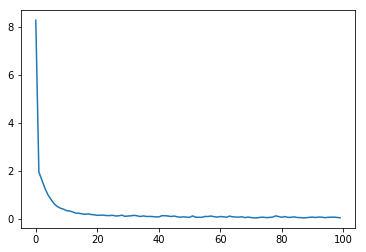

In [25]:
loss = hist_model.history['loss']

plt.plot(loss)

In [26]:
index = np.random.randint(0,206)

index

66

In [27]:
pred = model.predict(x_test[index].reshape(1,100,100,3))

In [28]:
pred_index = np.argmax(pred)

pred_index

5

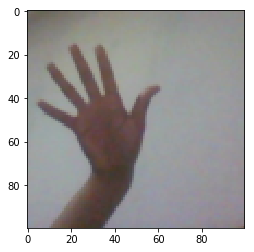

In [29]:
plt.imshow(x_test[index])

In [30]:
def predict_img():
    index = np.random.randint(0,206)
    #print("index:",index)
    pred = model.predict(x_test[index].reshape(1,100,100,3))
    print("predicted image is:",np.argmax(pred))
    print("====showing the image======")
    plt.imshow(x_test[index],cmap='gray')
    

('predicted image is:', 1)
====showing the image======


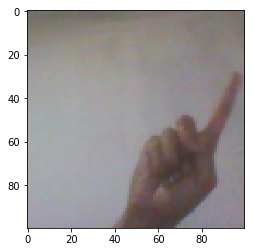

In [56]:
predict_img()

In [22]:
model.save("model_rgb_low.h5")

In [58]:
model